In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import pearsonr
import scipy.stats as st

In [35]:
df_digital = pd.read_csv('../vanguar_ab_test/Data/clean/digital_footprints.csv')
df_demo = pd.read_csv('../vanguar_ab_test/Data/clean/demo_clean.csv')
df_experiment = pd.read_csv('../vanguar_ab_test/Data/clean/clean_final_experiment.csv')

In [36]:
df_digital.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017 15:27
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017 15:26
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017 15:19
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017 15:19
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017 15:18


In [37]:
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,12.0,1.0,60.0,unknown,2,45105.30,6,9
1,2304905,14.0,10.0,58.0,unknown,2,110860.30,6,9
2,1439522,10.0,4.0,32.0,unknown,2,52467.79,6,9
3,1562045,32.0,6.0,49.0,male,2,67454.65,3,6
4,5126305,24.0,1.0,33.0,female,2,103671.75,0,3


In [38]:
df_experiment.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [39]:
# Using concat to combine df_digital, df_demo, and df_experiment

df = pd.concat([df_digital, df_demo, df_experiment], axis=1, join='inner')

df.head()

,client_id,visitor_id,visit_id,process_step,date_time,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,client_id,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017 15:27,836976,12.0,1.0,60.0,unknown,2,45105.30,6,9,9988021,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017 15:26,2304905,14.0,10.0,58.0,unknown,2,110860.30,6,9,8320017,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017 15:19,1439522,10.0,4.0,32.0,unknown,2,52467.79,6,9,4033851,Control
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017 15:19,1562045,32.0,6.0,49.0,male,2,67454.65,3,6,1982004,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017 15:18,5126305,24.0,1.0,33.0,female,2,103671.75,0,3,9294070,Control


In [40]:


# Convert the 'date_time' column to datetime 
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort the DataFrame by date_time to ensure chronological order
df = df.sort_values('date_time')

# Calculate the time differences between consecutive steps
df['duration_between_steps'] = df['date_time'].diff()


df = df.sort_values(['process_step', 'date_time'])
df['duration_between_steps'] = df.groupby('process_step')['date_time'].diff()

print(df)

       client_id             visitor_id                      visit_id  \
35088    7179755  167765295_97487764427   264484508_5982901710_928530   
58940    4856478  257497507_25256904510   71742713_20814504119_232694   
31310    4908184  733865528_59300287559  315008965_48059247230_849397   
55990      92137  587122839_77968384420  977932583_34236140955_582637   
56113    3446089  205287905_22044494836  542212856_63070058727_535274   
...          ...                    ...                           ...   
26896    4766865  444853529_21314064659  201211443_70704498524_559013   
35113    5297883  457331605_99204874300  270106948_81373300642_595284   
15423    3524186   956081876_6300668311  314999130_17773836686_105156   
41729    1368967  373192126_70767437567  666904113_33341363199_924150   
67537    7873434  945301814_36007942823  111389398_71419555371_190810   

      process_step           date_time  client_id  clnt_tenure_yr  \
35088      confirm 2017-03-15 00:26:00    8542158     

/var/folders/j0/mq_mr2hj0hl8xv4kfq895gk40000gn/T/ipykernel_23083/4104739786.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


In [44]:
import pandas as pd


df = pd.DataFrame(df)

df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values(['process_step', 'date_time'])
df['duration_between_steps'] = df.groupby('process_step')['date_time'].diff()

print(df)


       client_id             visitor_id                      visit_id  \
35088    7179755  167765295_97487764427   264484508_5982901710_928530   
58940    4856478  257497507_25256904510   71742713_20814504119_232694   
31310    4908184  733865528_59300287559  315008965_48059247230_849397   
55990      92137  587122839_77968384420  977932583_34236140955_582637   
56113    3446089  205287905_22044494836  542212856_63070058727_535274   
...          ...                    ...                           ...   
26896    4766865  444853529_21314064659  201211443_70704498524_559013   
35113    5297883  457331605_99204874300  270106948_81373300642_595284   
15423    3524186   956081876_6300668311  314999130_17773836686_105156   
41729    1368967  373192126_70767437567  666904113_33341363199_924150   
67537    7873434  945301814_36007942823  111389398_71419555371_190810   

      process_step           date_time  client_id  clnt_tenure_yr  \
35088      confirm 2017-03-15 00:26:00    8542158     

In [45]:
import pandas as pd


# Create DataFrame
df = pd.DataFrame(df)

# Convert to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort by process and time
df = df.sort_values(['process_step', 'date_time'])

# Calculate duration between steps within each process
df['duration_between_steps'] = df.groupby('process_step')['date_time'].diff()

# Optional: Convert duration to minutes (or hours)
df['duration_minutes'] = df['duration_between_steps'].dt.total_seconds() / 60

print(df)


       client_id             visitor_id                      visit_id  \
35088    7179755  167765295_97487764427   264484508_5982901710_928530   
58940    4856478  257497507_25256904510   71742713_20814504119_232694   
31310    4908184  733865528_59300287559  315008965_48059247230_849397   
55990      92137  587122839_77968384420  977932583_34236140955_582637   
56113    3446089  205287905_22044494836  542212856_63070058727_535274   
...          ...                    ...                           ...   
26896    4766865  444853529_21314064659  201211443_70704498524_559013   
35113    5297883  457331605_99204874300  270106948_81373300642_595284   
15423    3524186   956081876_6300668311  314999130_17773836686_105156   
41729    1368967  373192126_70767437567  666904113_33341363199_924150   
67537    7873434  945301814_36007942823  111389398_71419555371_190810   

      process_step           date_time  client_id  clnt_tenure_yr  \
35088      confirm 2017-03-15 00:26:00    8542158     

In [47]:
df_filtered = df.dropna(subset=['duration_between_steps'])
df_filtered

,client_id,visitor_id,visit_id,process_step,date_time,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,client_id,Variation,duration_between_steps,duration_minutes
58940,4856478,257497507_25256904510,71742713_20814504119_232694,confirm,2017-03-15 08:02:00,2848225,8.0,11.0,40.0,unknown,2,38829.52,4,4,2505548,NaN,0 days 07:36:00,456.0
31310,4908184,733865528_59300287559,315008965_48059247230_849397,confirm,2017-03-15 11:09:00,312799,46.0,0.0,56.0,male,2,63515.61,3,6,9364089,Control,0 days 03:07:00,187.0
55990,92137,587122839_77968384420,977932583_34236140955_582637,confirm,2017-03-15 11:10:00,2166725,12.0,10.0,32.0,unknown,2,26365.18,1,1,5478419,NaN,0 days 00:01:00,1.0
56113,3446089,205287905_22044494836,542212856_63070058727_535274,confirm,2017-03-15 11:20:00,5100422,6.0,11.0,50.0,unknown,2,22235.40,3,3,5989471,NaN,0 days 00:10:00,10.0
18154,4304665,561539201_89956034406,890919474_99133285481_362803,confirm,2017-03-15 11:25:00,7741281,24.0,3.0,62.0,female,2,104741.21,2,5,2650327,Control,0 days 00:05:00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26896,4766865,444853529_21314064659,201211443_70704498524_559013,step_3,2017-04-30 21:53:00,5771710,24.0,1.0,32.0,male,2,113451.93,2,5,883426,Control,0 days 00:04:00,4.0
35113,5297883,457331605_99204874300,270106948_81373300642_595284,step_3,2017-04-30 21:55:00,6139917,32.0,3.0,50.0,male,2,107757.77,5,8,8497468,Test,0 days 00:02:00,2.0
15423,3524186,956081876_6300668311,314999130_17773836686_105156,step_3,2017-04-30 22:05:00,8530525,8.0,10.0,34.0,unknown,2,28089.41,0,3,2504073,Control,0 days 00:10:00,10.0
41729,1368967,373192126_70767437567,666904113_33341363199_924150,step_3,2017-04-30 22:51:00,4363136,50.0,8.0,25.0,female,3,60271.48,3,6,5345656,Control,0 days 00:46:00,46.0


In [48]:
total_duration_minutes = df.groupby('process_step')['duration_minutes'].sum()
print(total_duration_minutes)


process_step
confirm    67596.0
start      67619.0
step_1     67598.0
step_2     67597.0
step_3     67598.0
Name: duration_minutes, dtype: float64


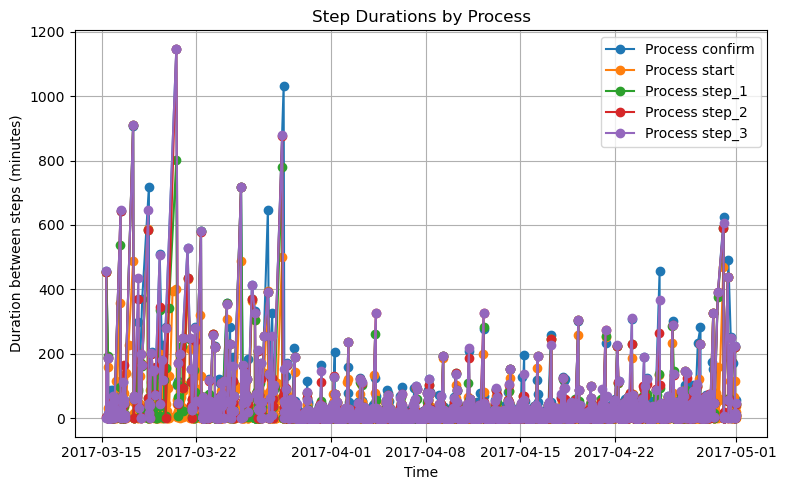

In [49]:

# Drop NaT durations for plotting
plot_df = df.dropna(subset=['duration_minutes'])

# Bar plot of durations
plt.figure(figsize=(8, 5))
for label, group in plot_df.groupby('process_step'):
    plt.plot(group['date_time'], group['duration_minutes'], marker='o', label=f'Process {label}')

plt.xlabel('Time')
plt.ylabel('Duration between steps (minutes)')
plt.title('Step Durations by Process')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
# Add a cumulative duration column
df['cumulative_minutes'] = df.groupby('process_step')['duration_minutes'].cumsum()

print(df)


       client_id             visitor_id                      visit_id  \
35088    7179755  167765295_97487764427   264484508_5982901710_928530   
58940    4856478  257497507_25256904510   71742713_20814504119_232694   
31310    4908184  733865528_59300287559  315008965_48059247230_849397   
55990      92137  587122839_77968384420  977932583_34236140955_582637   
56113    3446089  205287905_22044494836  542212856_63070058727_535274   
...          ...                    ...                           ...   
26896    4766865  444853529_21314064659  201211443_70704498524_559013   
35113    5297883  457331605_99204874300  270106948_81373300642_595284   
15423    3524186   956081876_6300668311  314999130_17773836686_105156   
41729    1368967  373192126_70767437567  666904113_33341363199_924150   
67537    7873434  945301814_36007942823  111389398_71419555371_190810   

      process_step           date_time  client_id  clnt_tenure_yr  \
35088      confirm 2017-03-15 00:26:00    8542158     

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

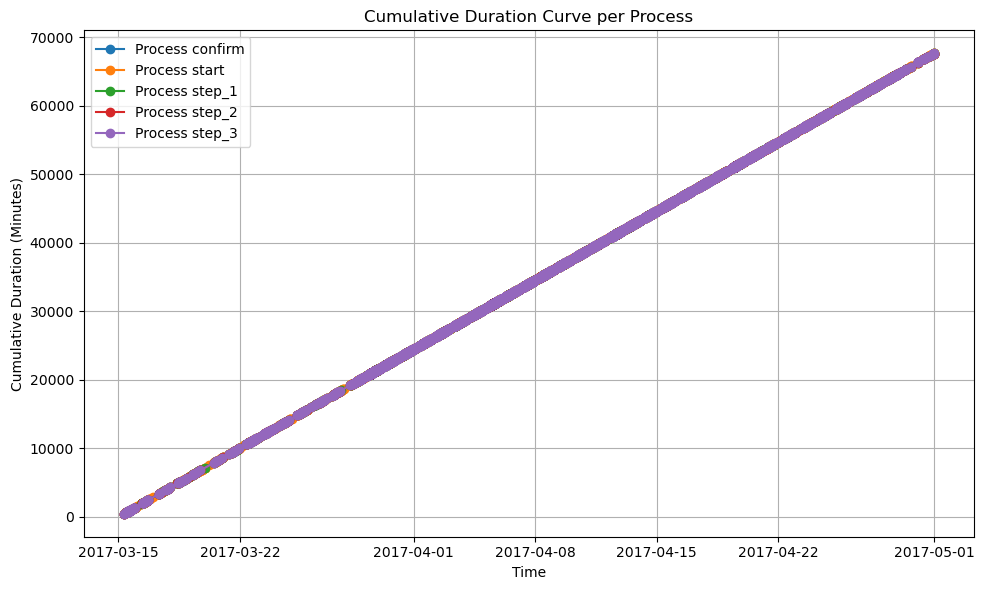

In [54]:
df['cumulative_minutes'] = df.groupby('process_step')['duration_minutes'].cumsum()


plt.figure(figsize=(10, 6))

# Plot each process line
for name, group in df.groupby('process_step'):
    plt.plot(group['date_time'], group['cumulative_minutes'], marker='o', label=f'Process {name}')

plt.title('Cumulative Duration Curve per Process')
plt.xlabel('Time')
plt.ylabel('Cumulative Duration (Minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
